[Perceptron Code](https://github.com/ctkatz/ctkatz.github.io/blob/main/posts/blog-6/perceptron.py)


## Abstract

In this blog post, I build the perceptron algorithim, which creates and optimizes a linear descsion boundary for binarily classifiable data. I find that the perceptron algorithim works on data over 2 diminesions, but it doesn't work on data that is non-linearly seperarable.

## About perceptron.grad()

The `grad()` method computes the perceptron update by first converting labels to \(\{-1,1\}\) and calculating the scores \( s = Xw \). It then identifies misclassified points using \( s_i y_i < 0 \) and creates a mask to apply updates only to those points. The gradient is computed as the mean of \( y x \) over the misclassified points, ensuring mini-batch learning. Finally, the update is scaled by a learning rate \( \alpha \), correctly implementing the perceptron update rule.








## Part A: Making Perceptron

In [1]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

In [2]:
import torch
torch.manual_seed(1234)

import torch

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    
    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)



In [45]:
torch.manual_seed(123)
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
batch_size = 5 
max_iter= 0
while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data mini-batch    
    # ix = torch.randperm(X.size(0))[:batch_size]  
    # X_batch = X[ix, :]
    # y_batch = y[ix]
    # local_loss= p.loss(X_batch, y_batch).item()
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i).item()


    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    #opt.step(X_batch, y_batch)
    max_iter+=1

In [4]:
print(loss)
print(p.w)
w = p.w

tensor(0.)
tensor([ 0.4089,  0.3166, -0.3581])


## Part B: Expirements

96


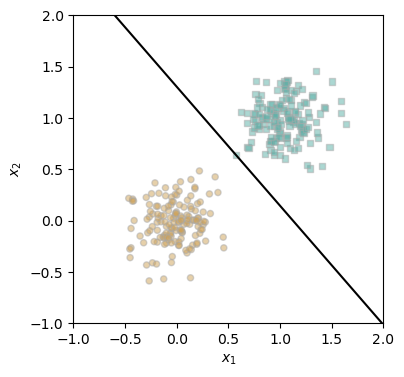

In [44]:

import matplotlib.pyplot as plt

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(w, -1, 2, ax, color = "black")
print(max_iter)

Here I create linerarly seperable data so we can see what happens to the loss, descsion boundary and weights through iterations of the training loop.

/var/folders/gx/d6zl9l4908q7p_vk4j3x06x00000gn/T/ipykernel_35223/4230432632.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )
/var/folders/gx/d6zl9l4908q7p_vk4j3x06x00000gn/T/ipykernel_35223/4230432632.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )


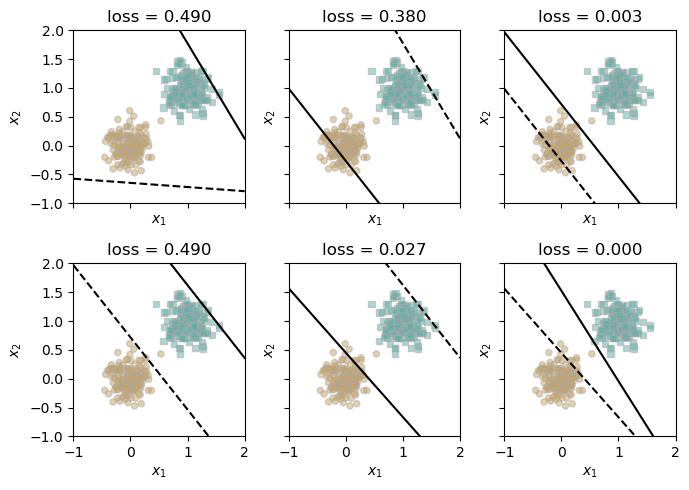

In [16]:
torch.manual_seed(1234)
import matplotlib.pyplot as plt
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:
    if current_ax >= 6:
        break
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i).item()
    
    if local_loss > 0:
        opt.step(x_i, y_i)
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        i_int = i.item() 
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()



Here we see the evolution of the loss function with linearly seperable data. This visualization shows the evolution of the loss for perceptron every iteration. We see improvement in the drawing of the lines as perceptron continutes to update the weights to shift the line, eventually achieving a very low loss of 0. This is becuase perceptron identifies the misclassified points and re-fits until there are no misclassified points.

In [17]:
#creating non-linearly seperable data
torch.manual_seed(1234)

def nonlinearly_separable_data(n_points=300, noise=0.2, p_dims=2):
    y = torch.arange(n_points) >= int(n_points / 2)
    
    # Increase noise to create significant overlap
    X = y[:, None] + torch.normal(0.0, noise, size=(n_points, p_dims))
    
    # Add bias term (column of ones)
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)


    return X, y

X, y = nonlinearly_separable_data(n_points=300, noise=1.0)



In [18]:
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
max_iter= 0

while loss > 0 and max_iter < 1001: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iter += 1

w= p.w
scores = p.score(X)

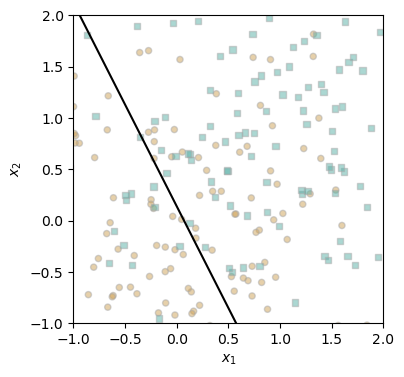

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(w, -1, 2, ax, color = "black")


The data I generate here has a lot of noise so it is non-linearly seperarable. This is so we can see what happens to the descison boundary, score and weights as it runs through iterations. I added a breakout point (1000 iterations) in the training loop

/var/folders/gx/d6zl9l4908q7p_vk4j3x06x00000gn/T/ipykernel_35223/2906442253.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )
/var/folders/gx/d6zl9l4908q7p_vk4j3x06x00000gn/T/ipykernel_35223/2906442253.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )


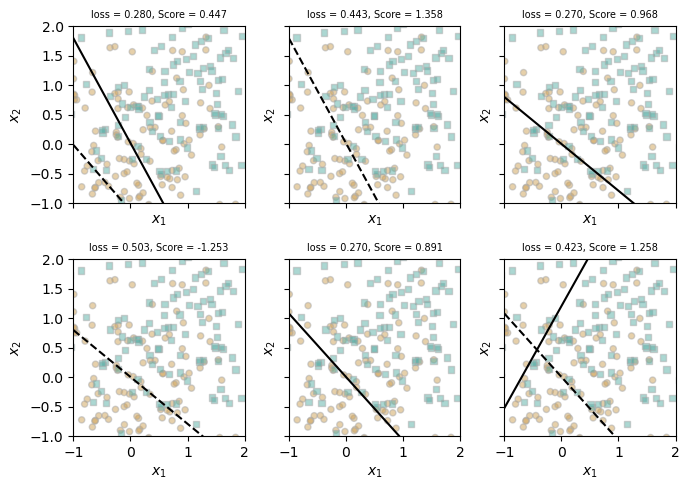

In [20]:
torch.manual_seed(12345)
import matplotlib.pyplot as plt
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
w= p.w
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:
    if current_ax >= 6:
        break
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i).item()

    if local_loss > 0:
        opt.step(x_i, y_i)
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = marker_map.get(2 * y[i].item() - 1, 0) )
        # draw_line(w, -10, 10, ax, color = "black")
        loss = p.loss(X, y).item()
        scores = p.score(X).mean().item()
        ax.set_title(f"loss = {loss:.3f}, Score = {scores:.3f}", fontsize= 7)
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()



With this non-linearly seperable data, we see that the scores and the loss keeps changing, with no quantifiable improvements in the score. Instead, since the data can't be seperated, it appears to be a random generation of descision boundaries, where the score changes drastically every time. If we didn't cap it by setting a max_iter, it would run forever because the loss will never be 0.

In [23]:
import torch
torch.manual_seed(1234)

import torch

torch.manual_seed(1234)

def perceptron_data_5d(n_points = 300, noise = 0.2, p_dims = 5):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    
    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)


In [24]:
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
max_iter= 0

while loss > 0 and max_iter < 1001: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iter += 1

w= p.w
scores = p.score(X)

Here I run the training loop on the above data, which has 5 dimensions. I store the scores for each iteration in scores and then plot that over the number of iterations to look at how the score changes over time.

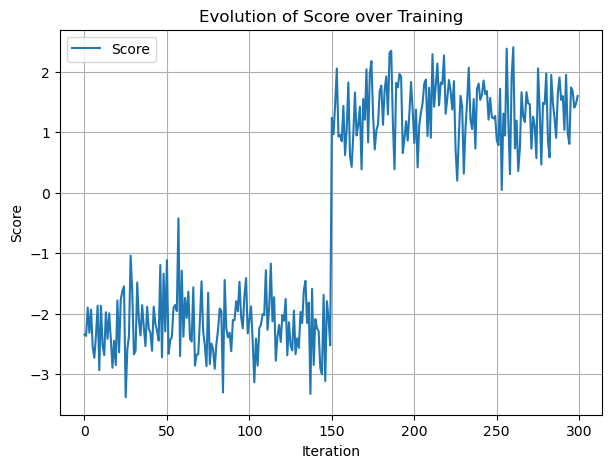

In [25]:
plt.plot(scores, label="Score")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("Evolution of Score over Training")
plt.grid(True)
plt.legend()
plt.show()


We see that the score increases over the training period for our 5d data, with the improvement happening at iteration 150 (halfway through the training loop). This proves that perceptron works for data with higher dimensions than just 2d, as we see score improvements for 5d data.

## Minibatch

In [35]:
import torch
torch.manual_seed(123)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    
    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)


96


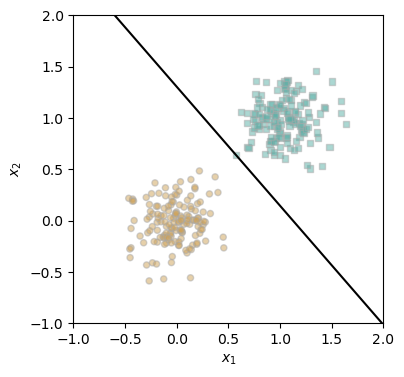

In [46]:
# k= 1
torch.manual_seed(123)
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
k= 1
max_iter= 0
while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data mini-batch    
    ix = torch.randperm(X.size(0))[:k]  
    X_batch = X[ix, :]
    y_batch = y[ix]
    local_loss= p.loss(X_batch, y_batch).item()
    # i = torch.randint(n, size = (1,))
    # x_i = X[[i],:]
    # y_i = y[i]
    # local_loss = p.loss(x_i, y_i).item()


    # perform a perceptron update using the random data point
    # opt.step(x_i, y_i)
    opt.step(X_batch, y_batch)
    max_iter+=1


fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(w, -1, 2, ax, color = "black")
print(max_iter)

When k=1, we see that minibatch performs similarly to regular perceptron. It takes the same number of iterations it did in the first example (96) to create a descsion boundary that sucessfully divides the data, showing similar results with a similar runtime.

8


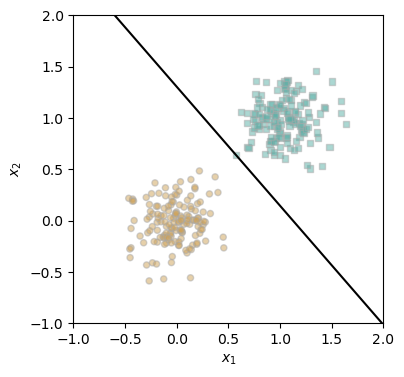

In [48]:
# batch size equals 10
torch.manual_seed(123)
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
k= 10
max_iter= 0
while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data mini-batch    
    ix = torch.randperm(X.size(0))[:k]  
    X_batch = X[ix, :]
    y_batch = y[ix]
    local_loss= p.loss(X_batch, y_batch).item()
    # i = torch.randint(n, size = (1,))
    # x_i = X[[i],:]
    # y_i = y[i]
    # local_loss = p.loss(x_i, y_i).item()


    # perform a perceptron update using the random data point
    # opt.step(x_i, ay_i)
    opt.step(X_batch, y_batch)
    max_iter+=1

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(w, -1, 2, ax, color = "black")
print(max_iter)

When the batch size is equal to 10, we see a decrease in the number of iterations it takes (only 8 on the same data) for the loss to be equal to 0. This is because it is computing weight updates in bigger batches, which makes it more accurate. 

tensor(0.2400)
184


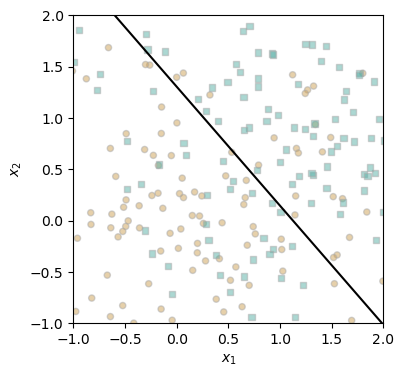

In [63]:
# batch size equals n
X, y = nonlinearly_separable_data(n_points = 300, noise = 1)

torch.manual_seed(123)
# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
k= n
max_iter= 0
while loss > .24: # dangerous -- only terminates if data is linearly separable
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    # pick a random data mini-batch    
    ix = torch.randperm(X.size(0))[:k]  
    X_batch = X[ix, :]
    y_batch = y[ix]
    local_loss= p.loss(X_batch, y_batch).item()
    # i = torch.randint(n, size = (1,))
    # x_i = X[[i],:]
    # y_i = y[i]
    # local_loss = p.loss(x_i, y_i).item()


    # perform a perceptron update using the random data point
    # opt.step(x_i, ay_i)
    opt.step(X_batch, y_batch)
    max_iter+=1

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(w, -1, 2, ax, color = "black")
print(loss)
print(max_iter)


Here we can see that when the batch size is equal to the number of datapoints n, loss converges even when the data is non-linearly seperable. In this case, the loss converged to .23.

## Runtime

The perceptron algorithim involves checking each datapoint and updating the weights if the data points are misclassified. This means that it checks n datapoints, so O(n). However, for each datapoint, perceptron takes the dot product between the feature vector and the weight vector, so the overall time is O(n*p), therefore it depends on both the number of datapoints and the number of features. 

Using mini-batch, it is instead O(m*p) instead of O(n*p), because we are now running for m batches instead of n datapoints, where p is still the number of features.

## Conclusion

In this blog post, I write and run the perceptron algoritihim to demonstrate it's effectivness at finding descsion boundaries on linearly seperable data. I also includ mini-batching, which updates the weights in batches instead of one point at a time. I show expierements to show how perceptron works with different types of data in different dimensions and discuss the runtime.
